# Ethereum Price Prediction

This project loads historical cryptocurrency data, performs exploratory data analysis (EDA), engineers predictive features, trains a linear regression model, and evaluates their ability to predict Ethereum closing prices.

![](Visuals/Visual_1.png)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

# Load CSV into Dataframe

In [3]:
dataframed = pd.read_csv('crypto_data_updated_13_november.csv')

# Shape of the Data
- 9 Columns
- 1827 Rows

In [ ]:
print('Shape of the Data :', dataframed.shape)

Shape of the Data: (1827, 9)


# Drop rows with null values

In [5]:
dataframed = dataframed.dropna()

In [6]:
list(dataframed.columns)

['Date',
 'Close (BTC)',
 'Volume (BTC)',
 'Close (ETH)',
 'Volume (ETH)',
 'Close (USDT)',
 'Volume (USDT)',
 'Close (BNB)',
 'Volume (BNB)']

# Convert 'Date' to datetime and set as index

In [7]:
dataframed['Date'] = pd.to_datetime(dataframed['Date'])

In [8]:
dataframed.set_index('Date', inplace=True)

In [9]:
eth_data = dataframed[['Close (ETH)', 'Volume (ETH)']]

# ETHEREUM PRICE & VOLUME ANALYSIS

In [ ]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.03)

# Price Trace
fig.add_trace(go.Scatter(
    x=dataframed.index, y=dataframed['Close (ETH)'],
    mode='lines',
    name='ETH Price',
    line=dict(color='#ff0000', width=2),
    hovertemplate='<b>%{x|%b %d, %Y}</b><br>$%{y:.2f}<extra></extra>'
), row=1, col=1)

# Volume Trace
fig.add_trace(go.Bar(
    x=dataframed.index, y=dataframed['Volume (ETH)'],
    name='Volume',
    marker_color='#fcfdff',
    hovertemplate='Volume: %{y:,.0f}<extra></extra>'
), row=2, col=1)

# Dark mode styling 
fig.update_layout(
    title='ETHEREUM PRICE & VOLUME ANALYSIS',
    template='plotly_dark',
    hovermode='x unified',
    height=600,
    font=dict(family='Arial', size=12),
    margin=dict(t=60, b=20),
    legend=dict(orientation='h', yanchor='bottom', y=1.02)
)

fig.update_xaxes(rangeslider_visible=True, row=2, col=1)
fig.show()

# Create lagged features (3 days)

In [11]:
for x in range(1, 4):
    eth_data[f'Close_Lag_{x}'] = eth_data['Close (ETH)'].shift(x)
    eth_data[f'Volume_Lag_{x}'] = eth_data['Volume (ETH)'].shift(x)

In [12]:
eth_data.head()

,Close (ETH),Volume (ETH),Close_Lag_1,Volume_Lag_1,Close_Lag_2,Volume_Lag_2,Close_Lag_3,Volume_Lag_3
Date,,,,,,,,
2017-11-13 00:00:00+00:00,316.716003,1041889984,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-14 00:00:00+00:00,337.631012,1069680000,316.716003,1.041890e+09,NaN,NaN,NaN,NaN
2017-11-15 00:00:00+00:00,333.356995,722665984,337.631012,1.069680e+09,316.716003,1.041890e+09,NaN,NaN
2017-11-16 00:00:00+00:00,330.924011,797254016,333.356995,7.226660e+08,337.631012,1.069680e+09,316.716003,1.041890e+09
2017-11-17 00:00:00+00:00,332.394012,621732992,330.924011,7.972540e+08,333.356995,7.226660e+08,337.631012,1.069680e+09


# Drop rows with NaN (created by shifting)

In [13]:
eth_data = eth_data.dropna()

In [14]:
eth_data.head()

,Close (ETH),Volume (ETH),Close_Lag_1,Volume_Lag_1,Close_Lag_2,Volume_Lag_2,Close_Lag_3,Volume_Lag_3
Date,,,,,,,,
2017-11-16 00:00:00+00:00,330.924011,797254016,333.356995,7.226660e+08,337.631012,1.069680e+09,316.716003,1.041890e+09
2017-11-17 00:00:00+00:00,332.394012,621732992,330.924011,7.972540e+08,333.356995,7.226660e+08,337.631012,1.069680e+09
2017-11-18 00:00:00+00:00,347.612000,649638976,332.394012,6.217330e+08,330.924011,7.972540e+08,333.356995,7.226660e+08
2017-11-19 00:00:00+00:00,354.385986,1181529984,347.612000,6.496390e+08,332.394012,6.217330e+08,330.924011,7.972540e+08
2017-11-20 00:00:00+00:00,366.730011,807027008,354.385986,1.181530e+09,347.612000,6.496390e+08,332.394012,6.217330e+08


# Defining X

In [15]:
X = eth_data.drop('Close (ETH)', axis=1)

# Defining Y

In [16]:
y = eth_data['Close (ETH)']

# Split Data into Train/Test Sets

In [17]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Simple Linear Regression

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predict on test data

In [19]:
y_pred = model.predict(X_test)

# Calculate MAE

In [20]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: ${mae:.2f}")

Mean Absolute Error: $78.90


# Plot predictions vs actual

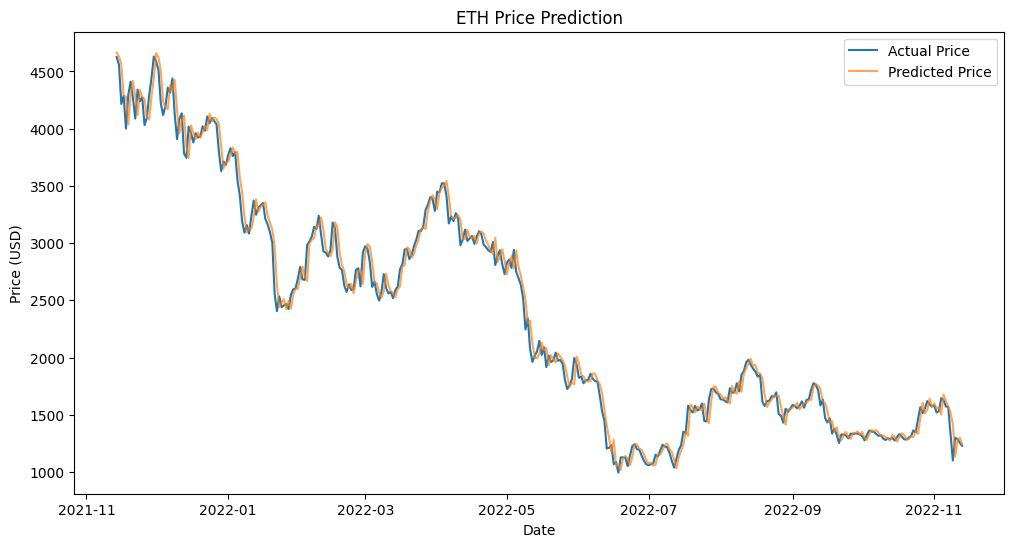

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price', alpha=0.7)
plt.title('ETH Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# ETH Price Prediction vs Actual (Interactive)

In [22]:
fig = go.Figure()

# Actual prices
fig.add_trace(go.Scatter(
    x=y_test.index, y=y_test,
    mode='lines',
    name='Actual Price',
    line=dict(color='#636EFA'),
    hovertemplate='Date: %{x}<br>Price: $%{y:.2f}<extra></extra>'
))

# Predicted prices
fig.add_trace(go.Scatter(
    x=y_test.index, y=y_pred,
    mode='lines',
    name='Predicted Price',
    line=dict(color='#EF553B', dash='dot'),
    hovertemplate='Date: %{x}<br>Predicted: $%{y:.2f}<extra></extra>'
))

# Customize layout
fig.update_layout(
    title='ETH Price Prediction vs Actual (Interactive)',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    hovermode='x unified',
    template='plotly_dark',
    legend=dict(orientation='h', yanchor='bottom', y=1.02),
    height=600
)

# Add range slider for zooming
fig.update_xaxes(rangeslider_visible=True)

fig.show()

# Mean Error Histogram

In [23]:
errors = y_test - y_pred

fig4 = go.Figure()
fig4.add_trace(go.Histogram(
    x=errors,
    nbinsx=50,
    marker_color='#ff0000',
    opacity=0.85,
    name='Errors',
    hovertemplate='Error: $%{x:.2f}<br>Count: %{y}<extra></extra>'
))

# Add mean line
mean_error = errors.mean()
fig4.add_vline(
    x=mean_error, 
    line_dash='dot',
    line_color='#0040ff',
    annotation_text=f'Mean Error: ${mean_error:.2f}'
)

# Dark mode styling
fig4.update_layout(
    title='PREDICTION ERROR DISTRIBUTION',
    xaxis_title='Prediction Error (Actual - Predicted)',
    yaxis_title='Frequency',
    template='plotly_dark',
    bargap=0.08,
    font=dict(family='Arial', size=12),
    height=500,
    showlegend=False
)

fig4.show()